In [13]:
%load_ext autoreload
%autoreload 2
from typing import Tuple
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_top_bottom,
    display_str,
    input_data,
    AggTuple, ScoreGetter, agg_list,
    get_roc_data
)
import tabulate
import pandas as pd

def f(
  ttype: list[TreeTypes],
  btype: list[TreeTypes],
  agg_tuple: AggTuple,
  score_getter: Tuple[str, ScoreGetter],
): return ttype, btype, agg_tuple, score_getter

sa, sc, ra, mf, syba = Score.getters()
min, max, avg = agg_list
def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False
if not detailed:
    [(_, source)] = list(input_data(False))
    display_str(source)
    
import matplotlib.pyplot as plt
USE_MF = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


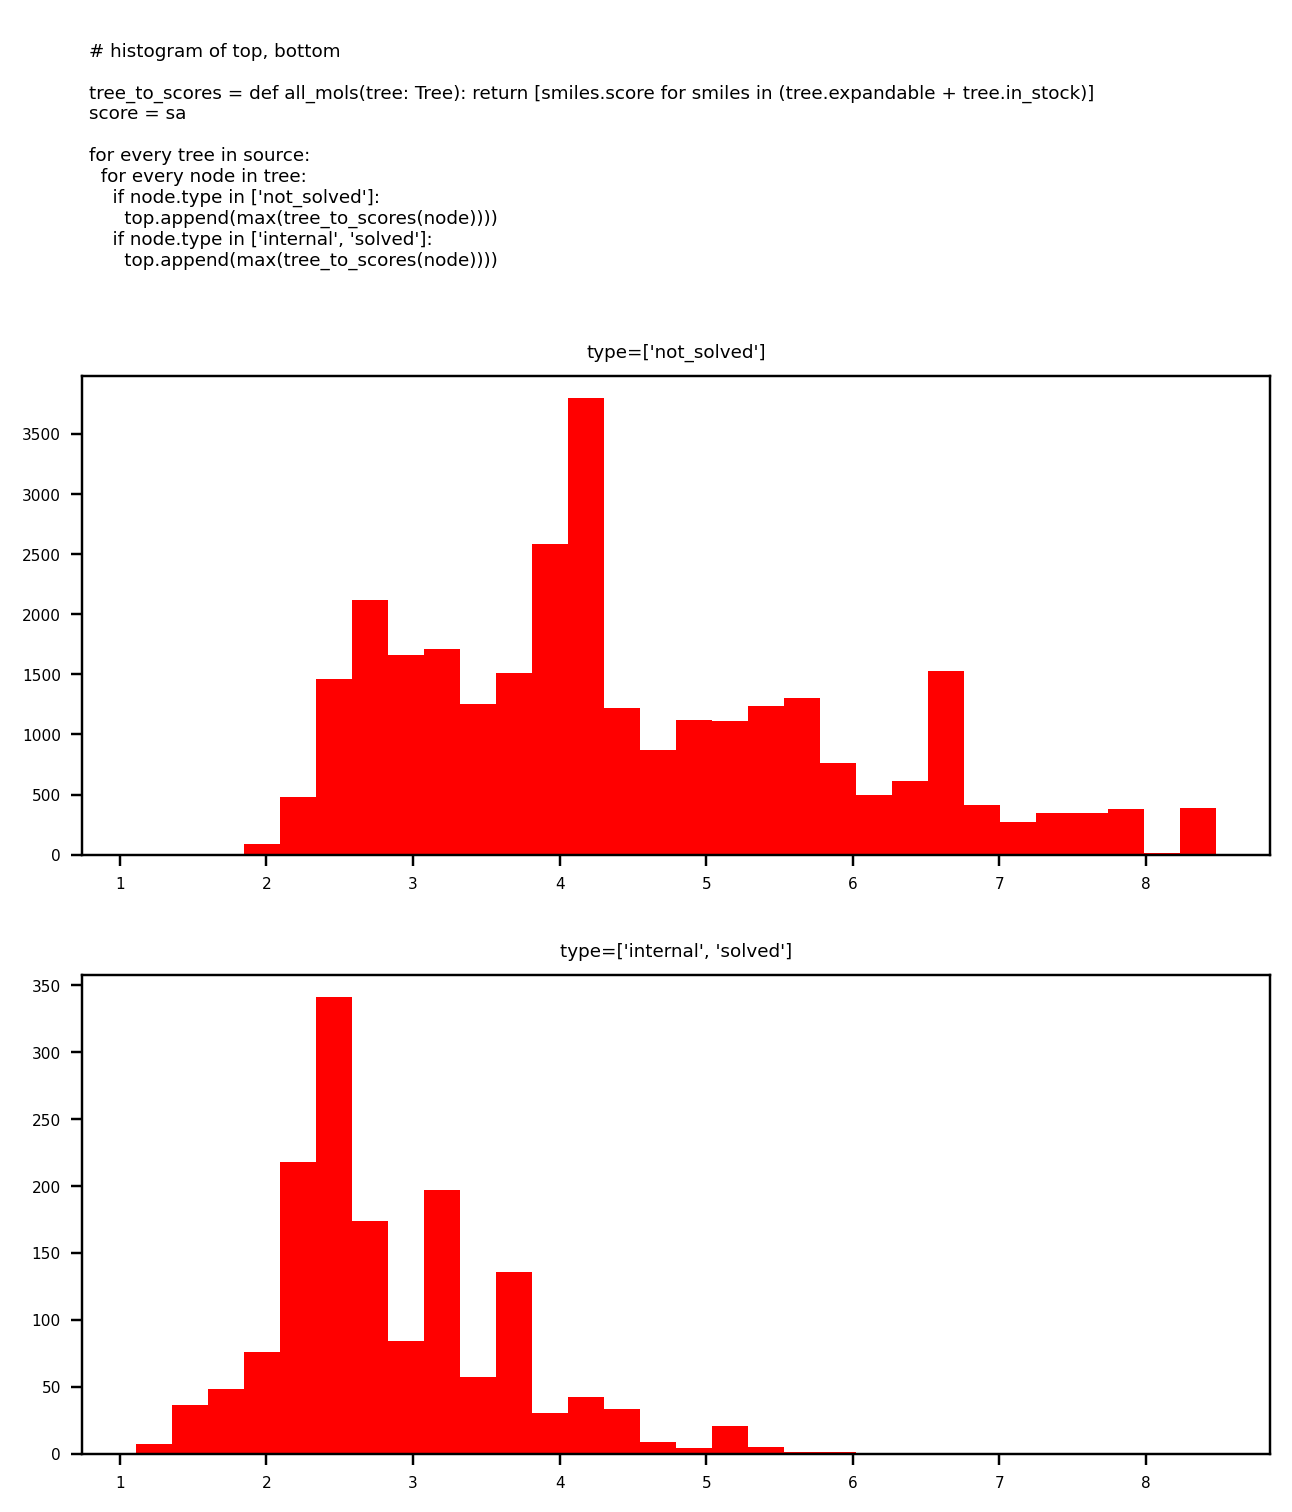

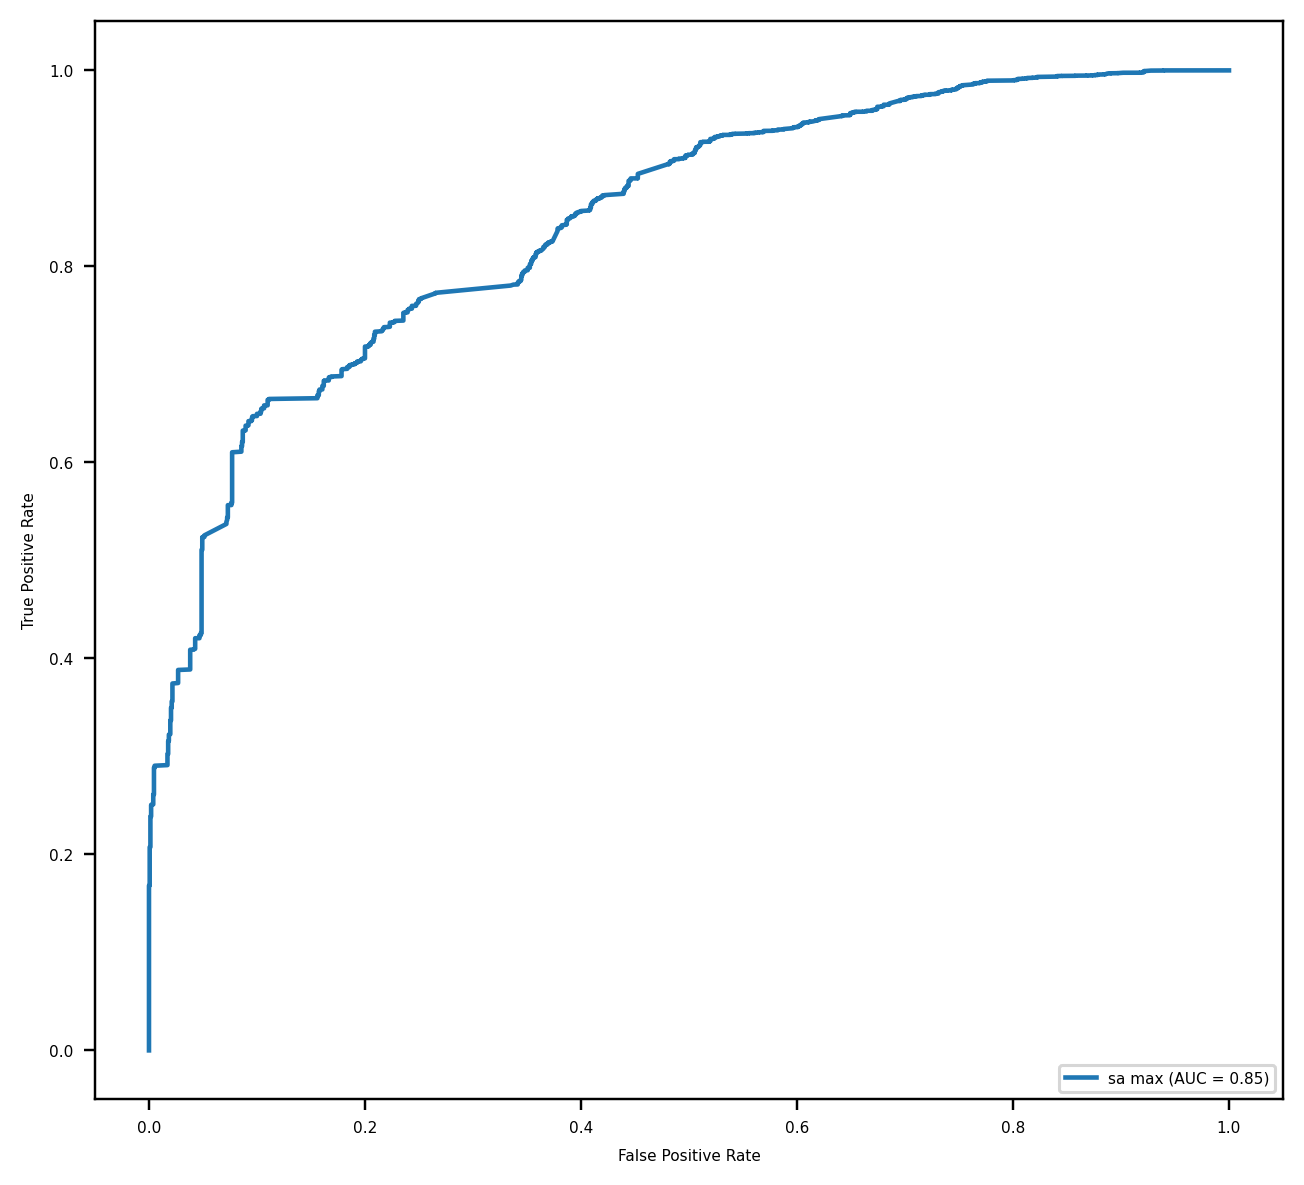

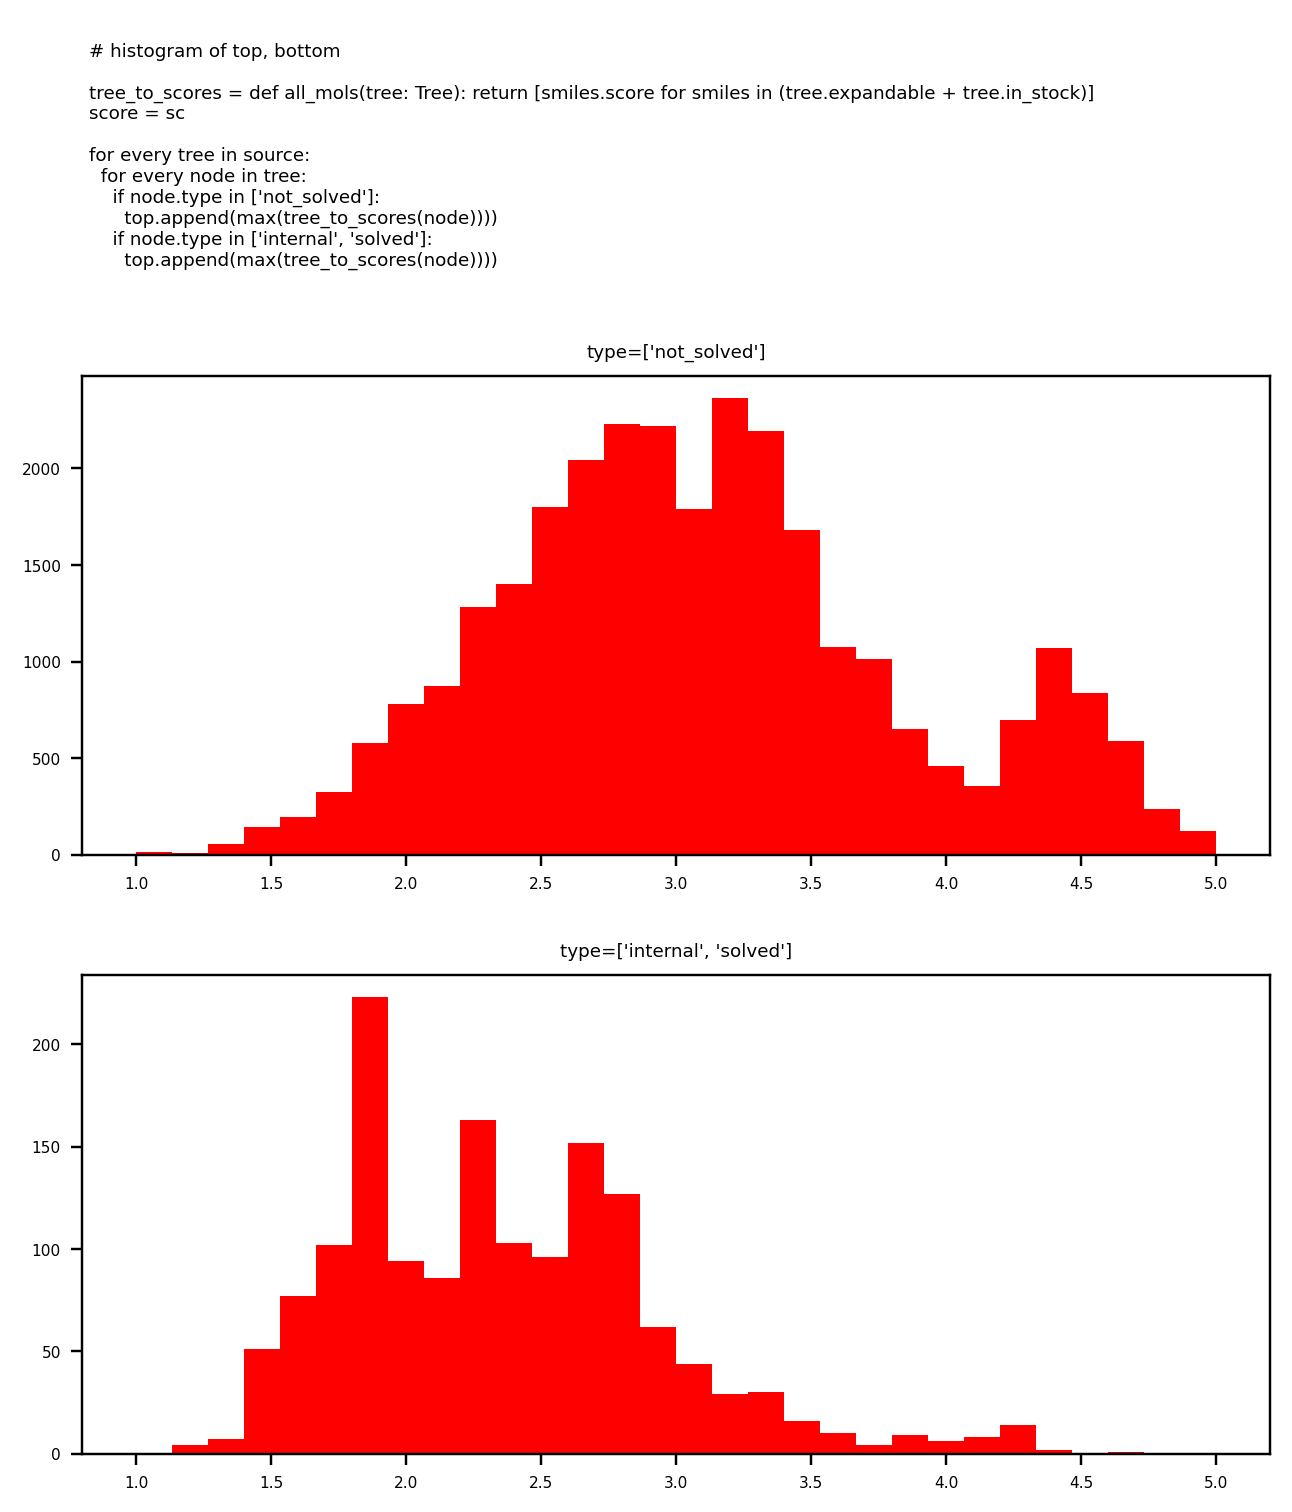

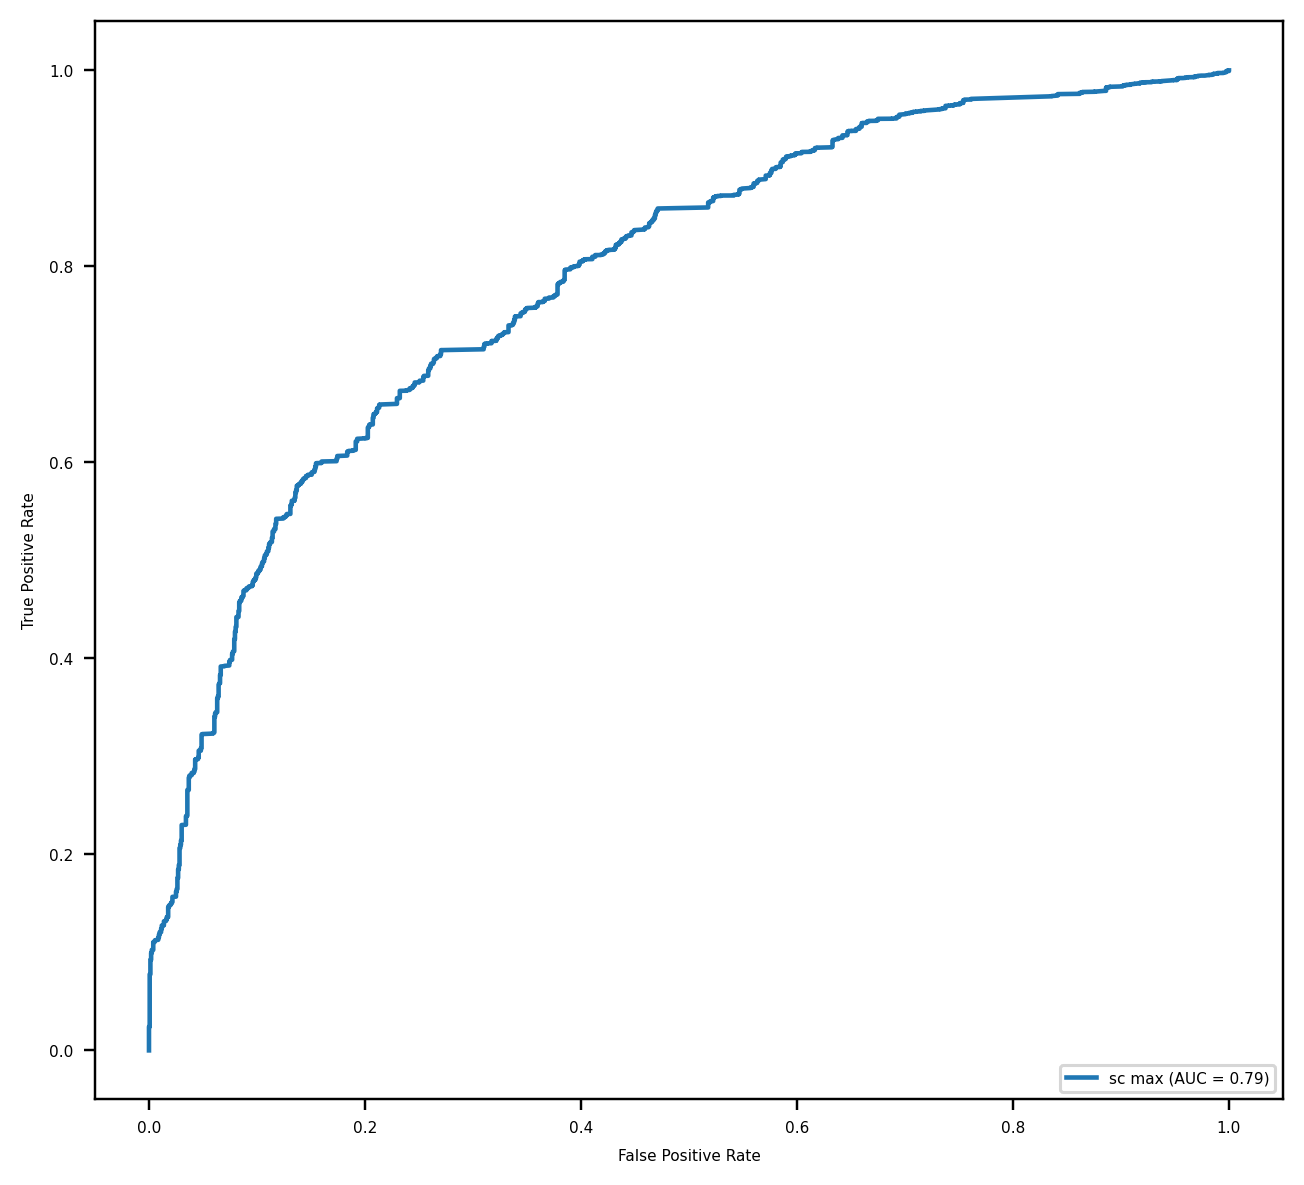

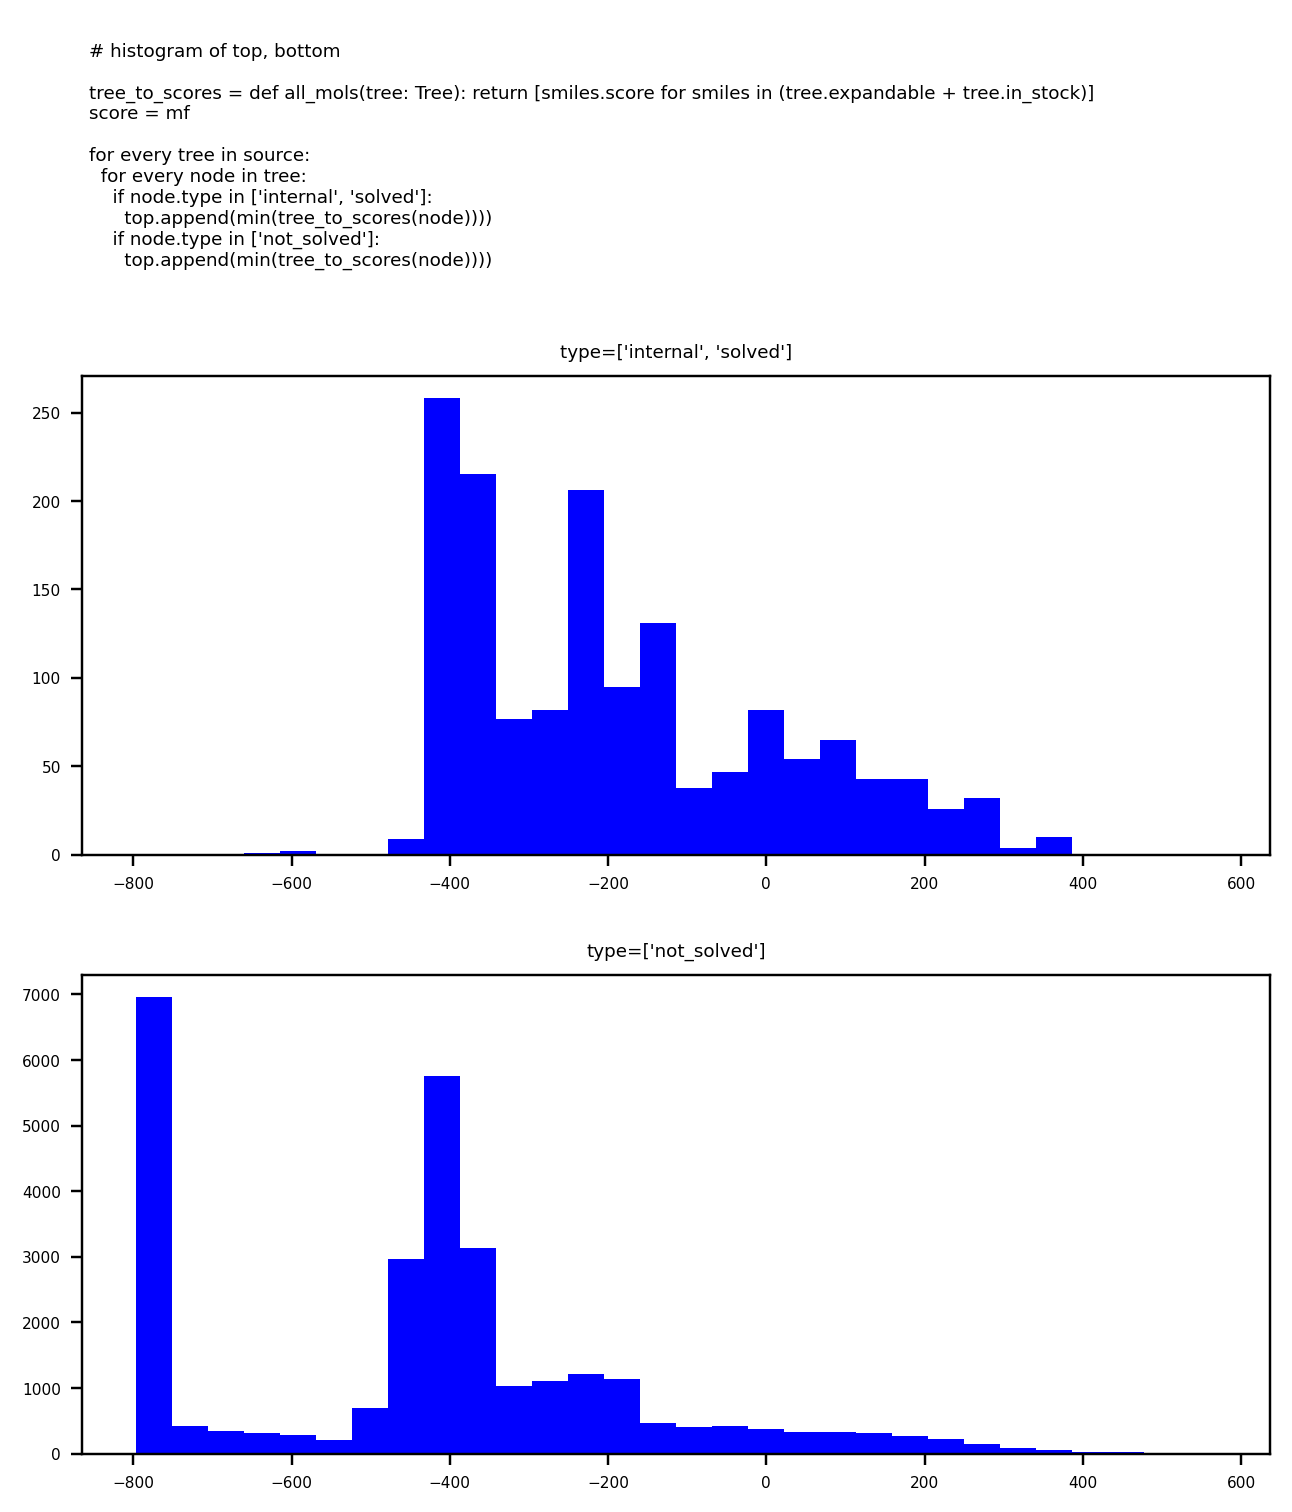

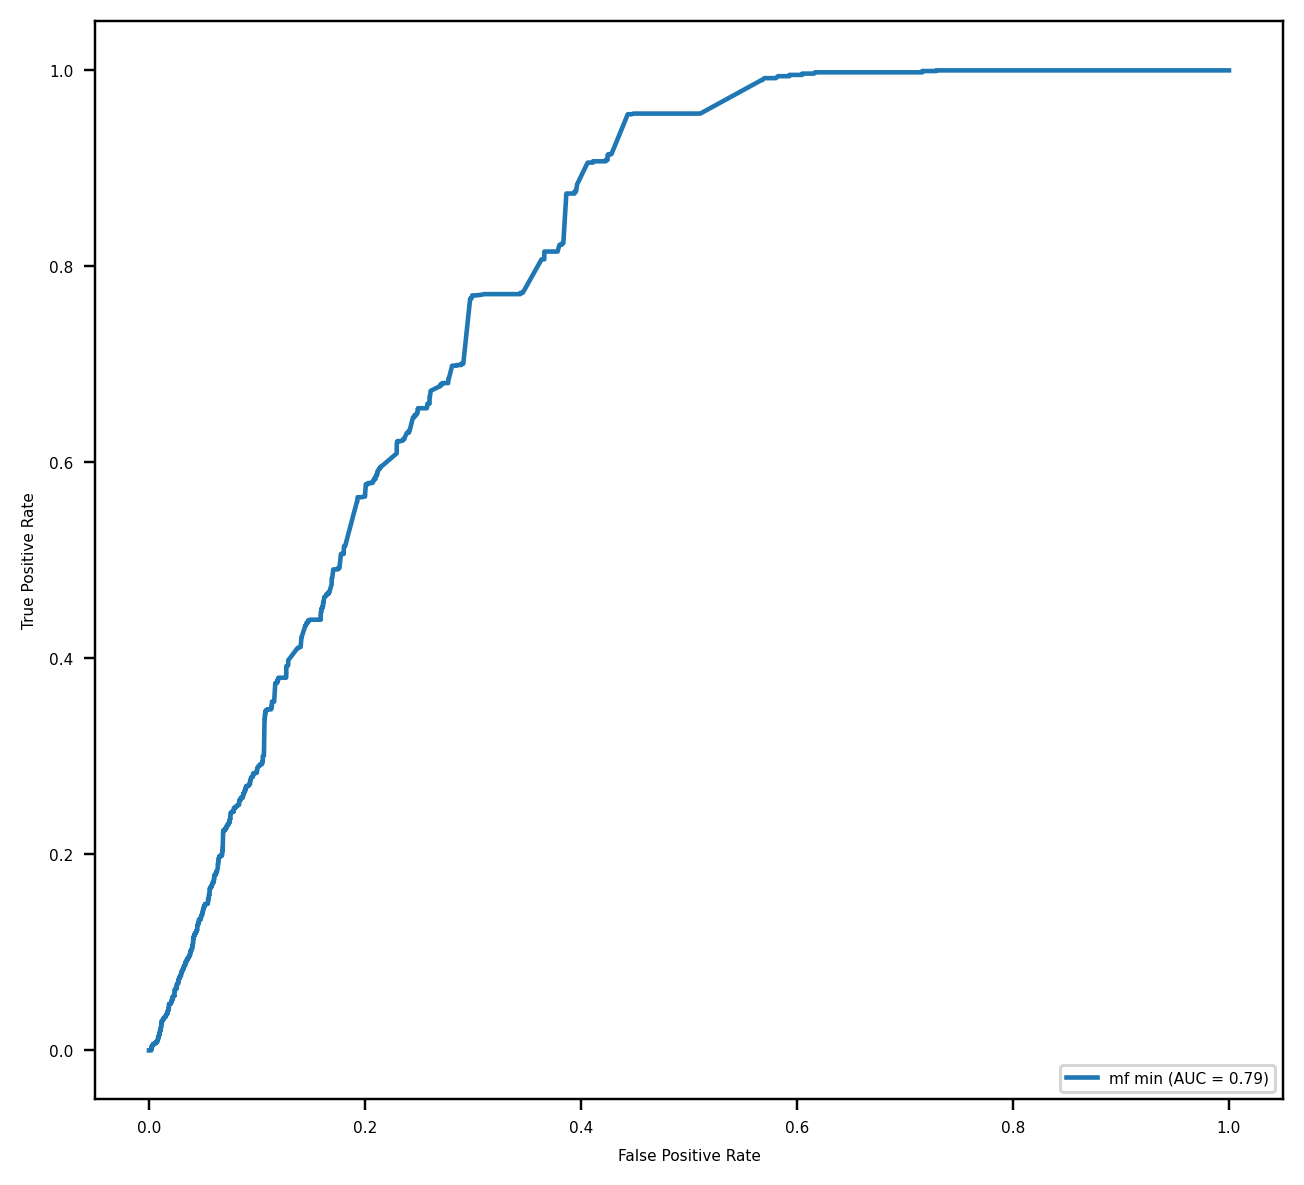

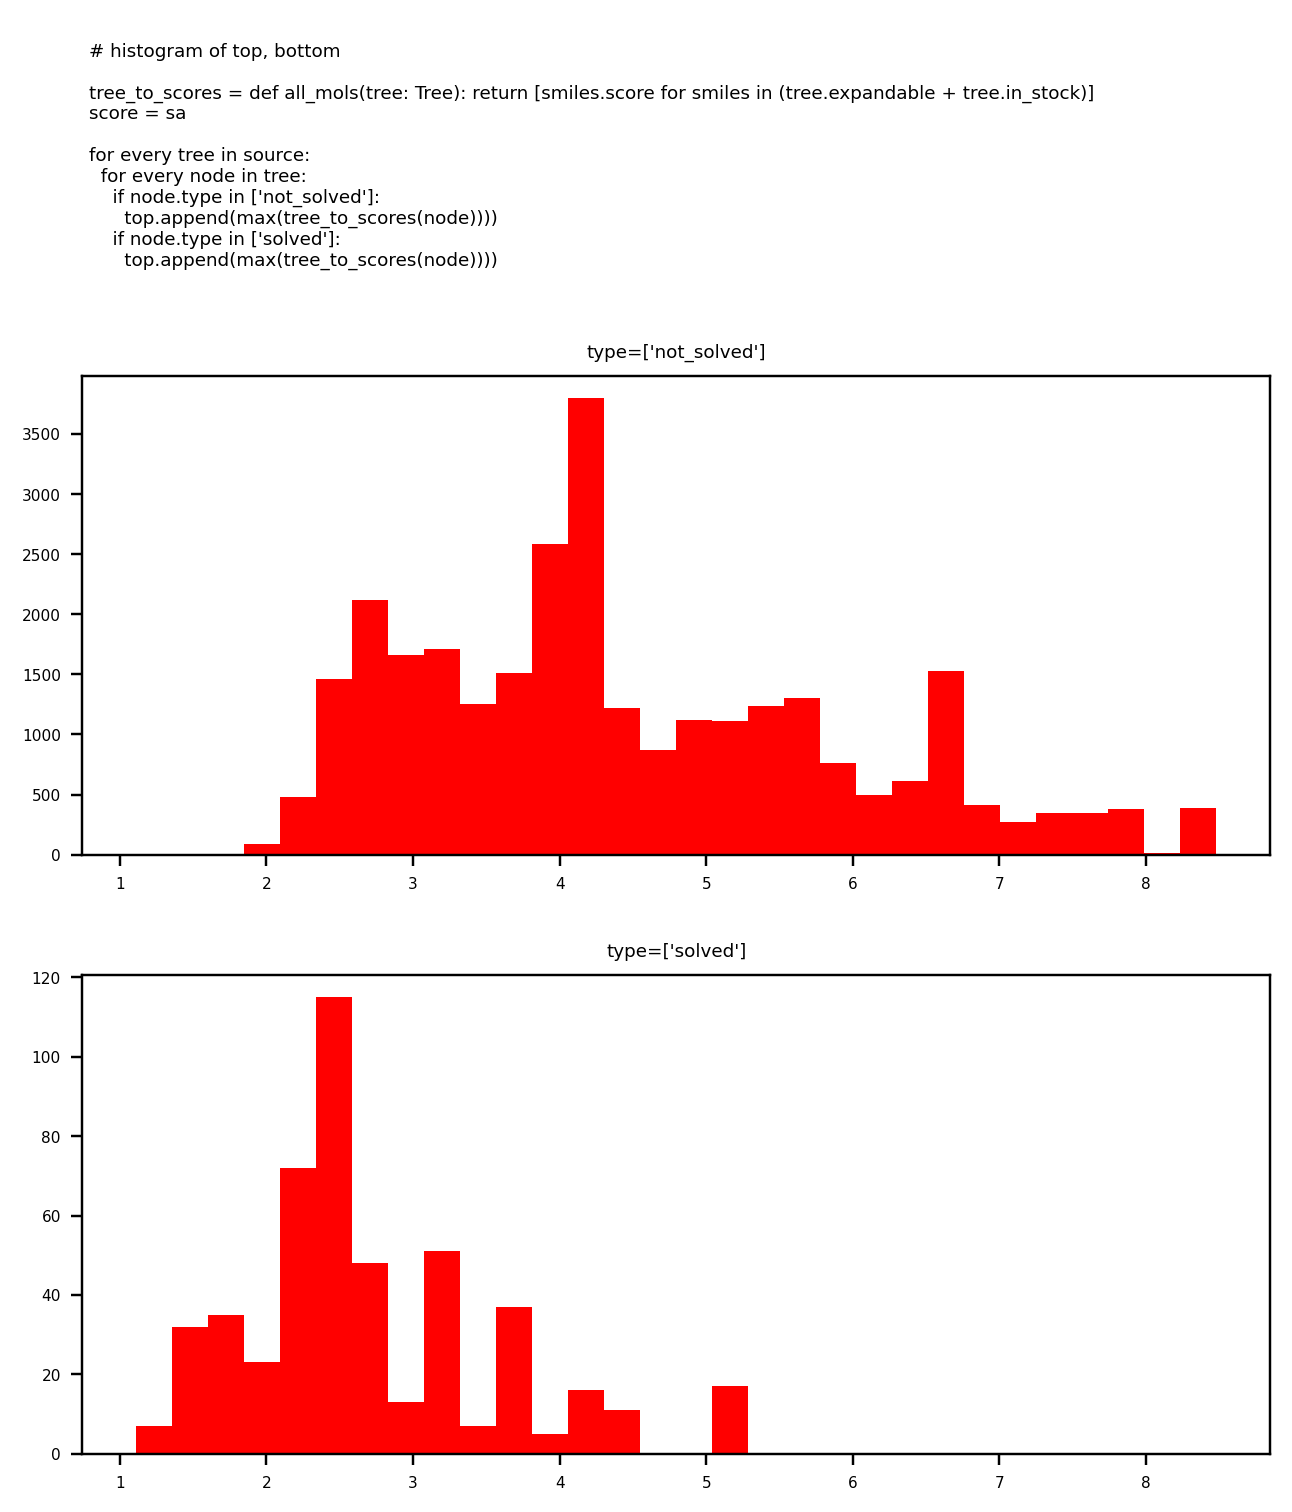

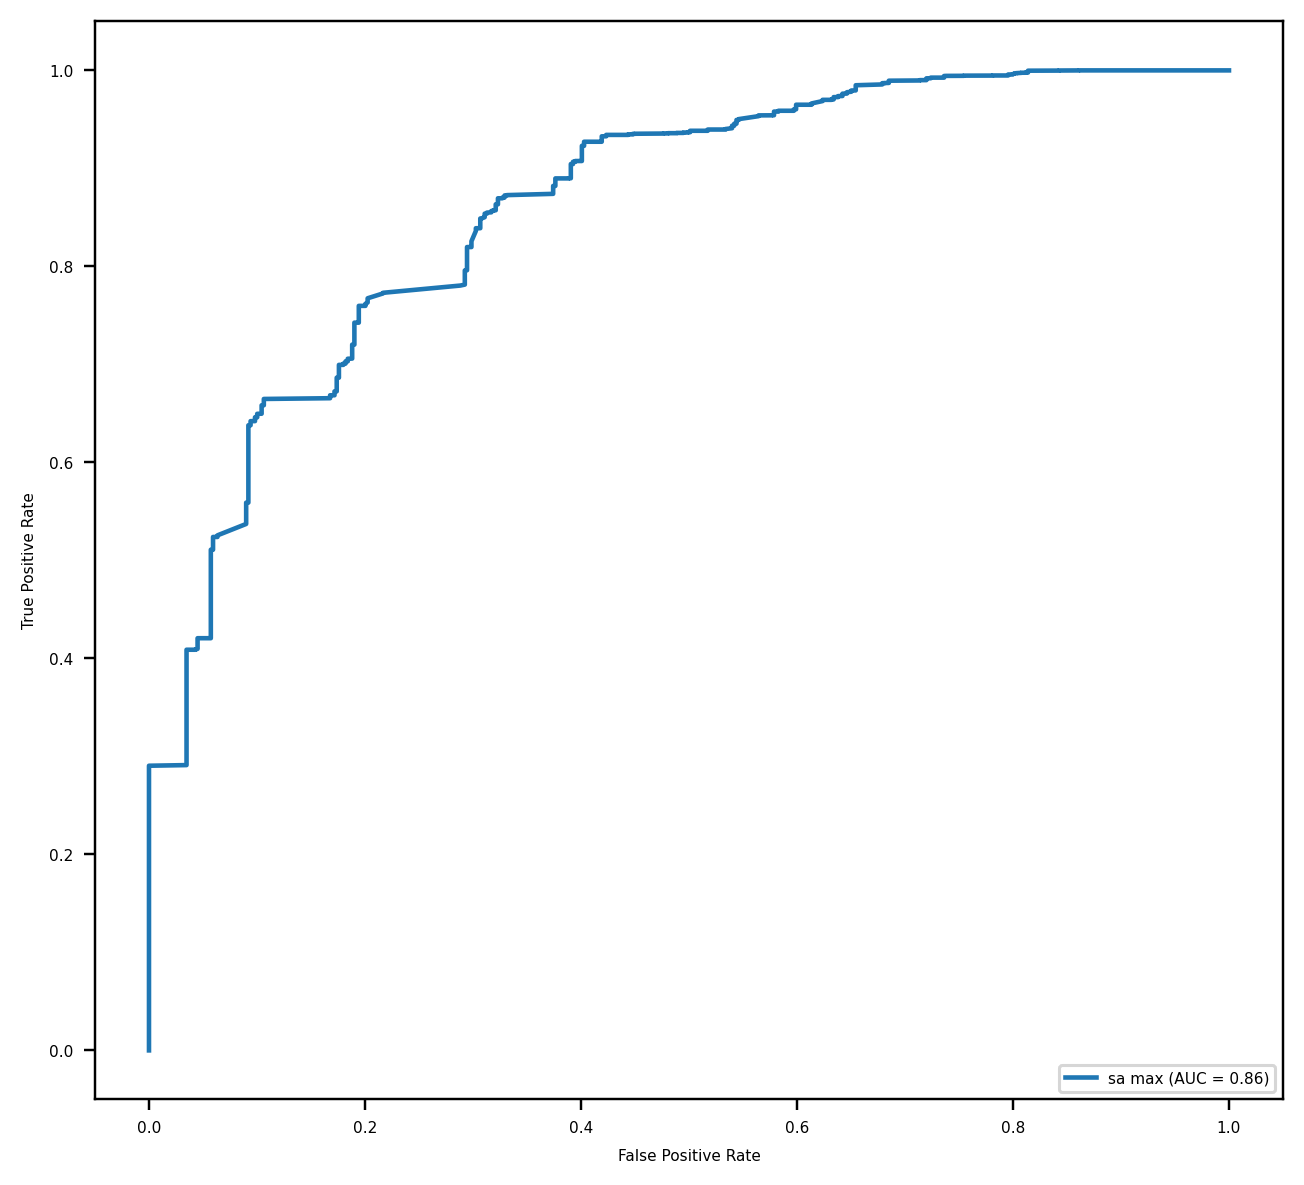

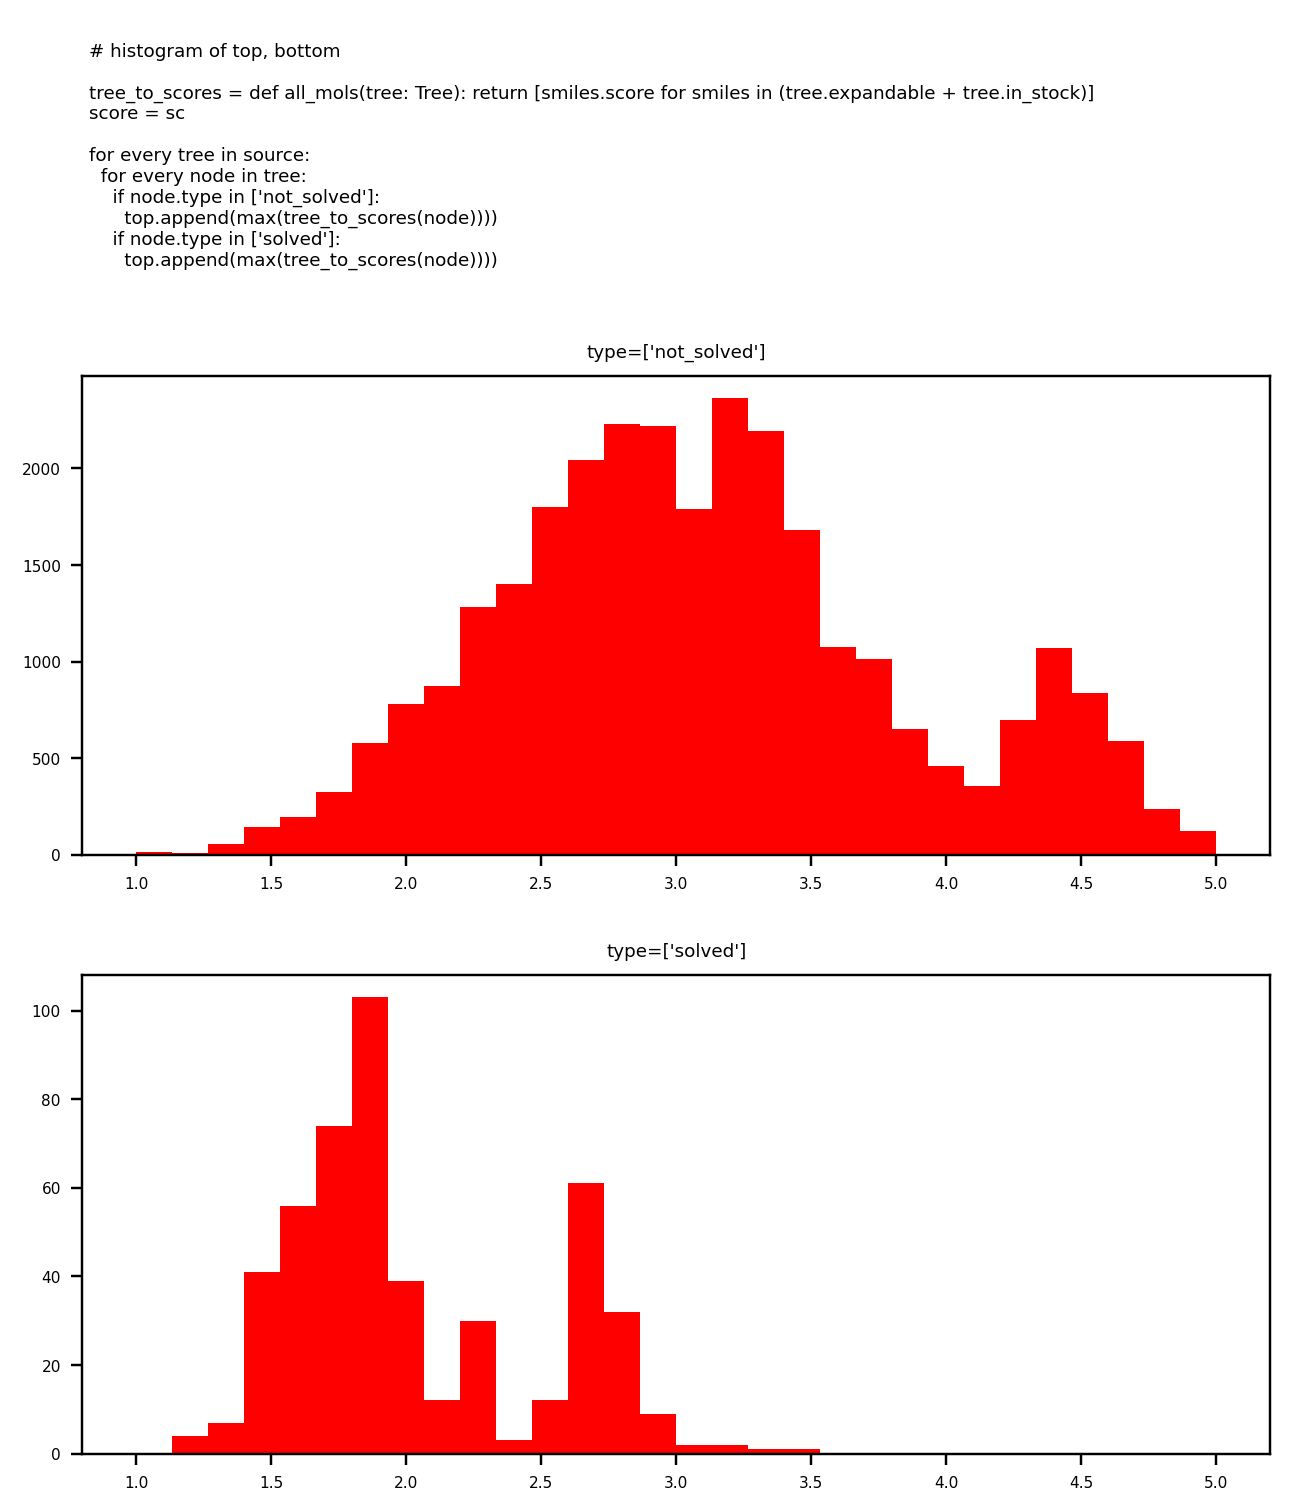

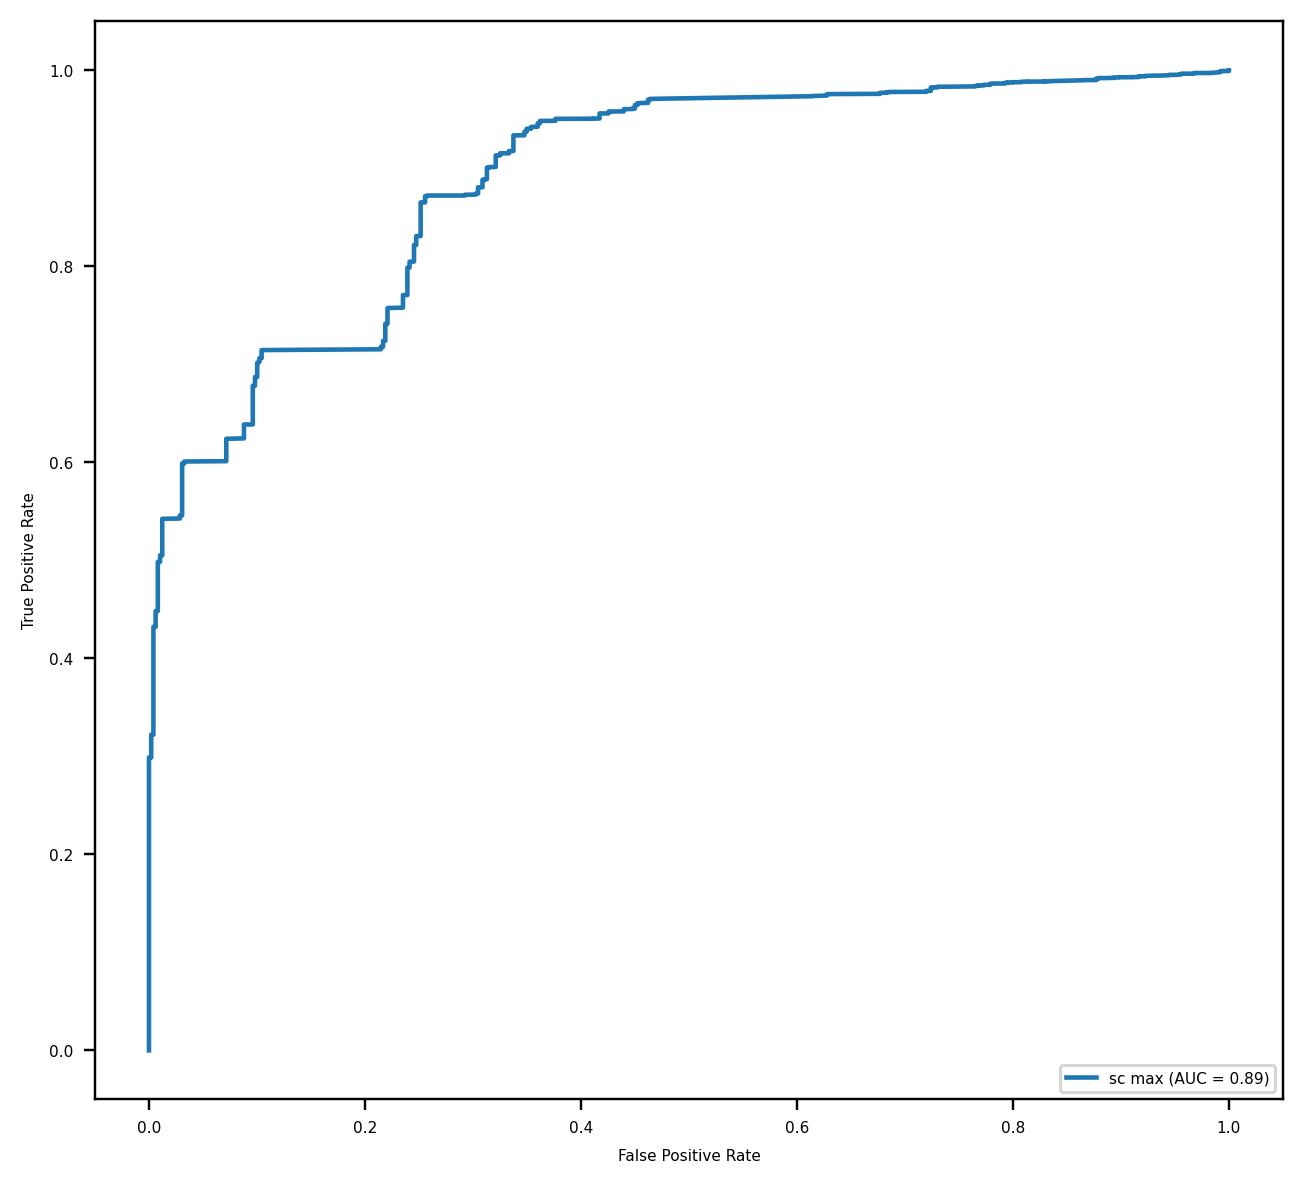

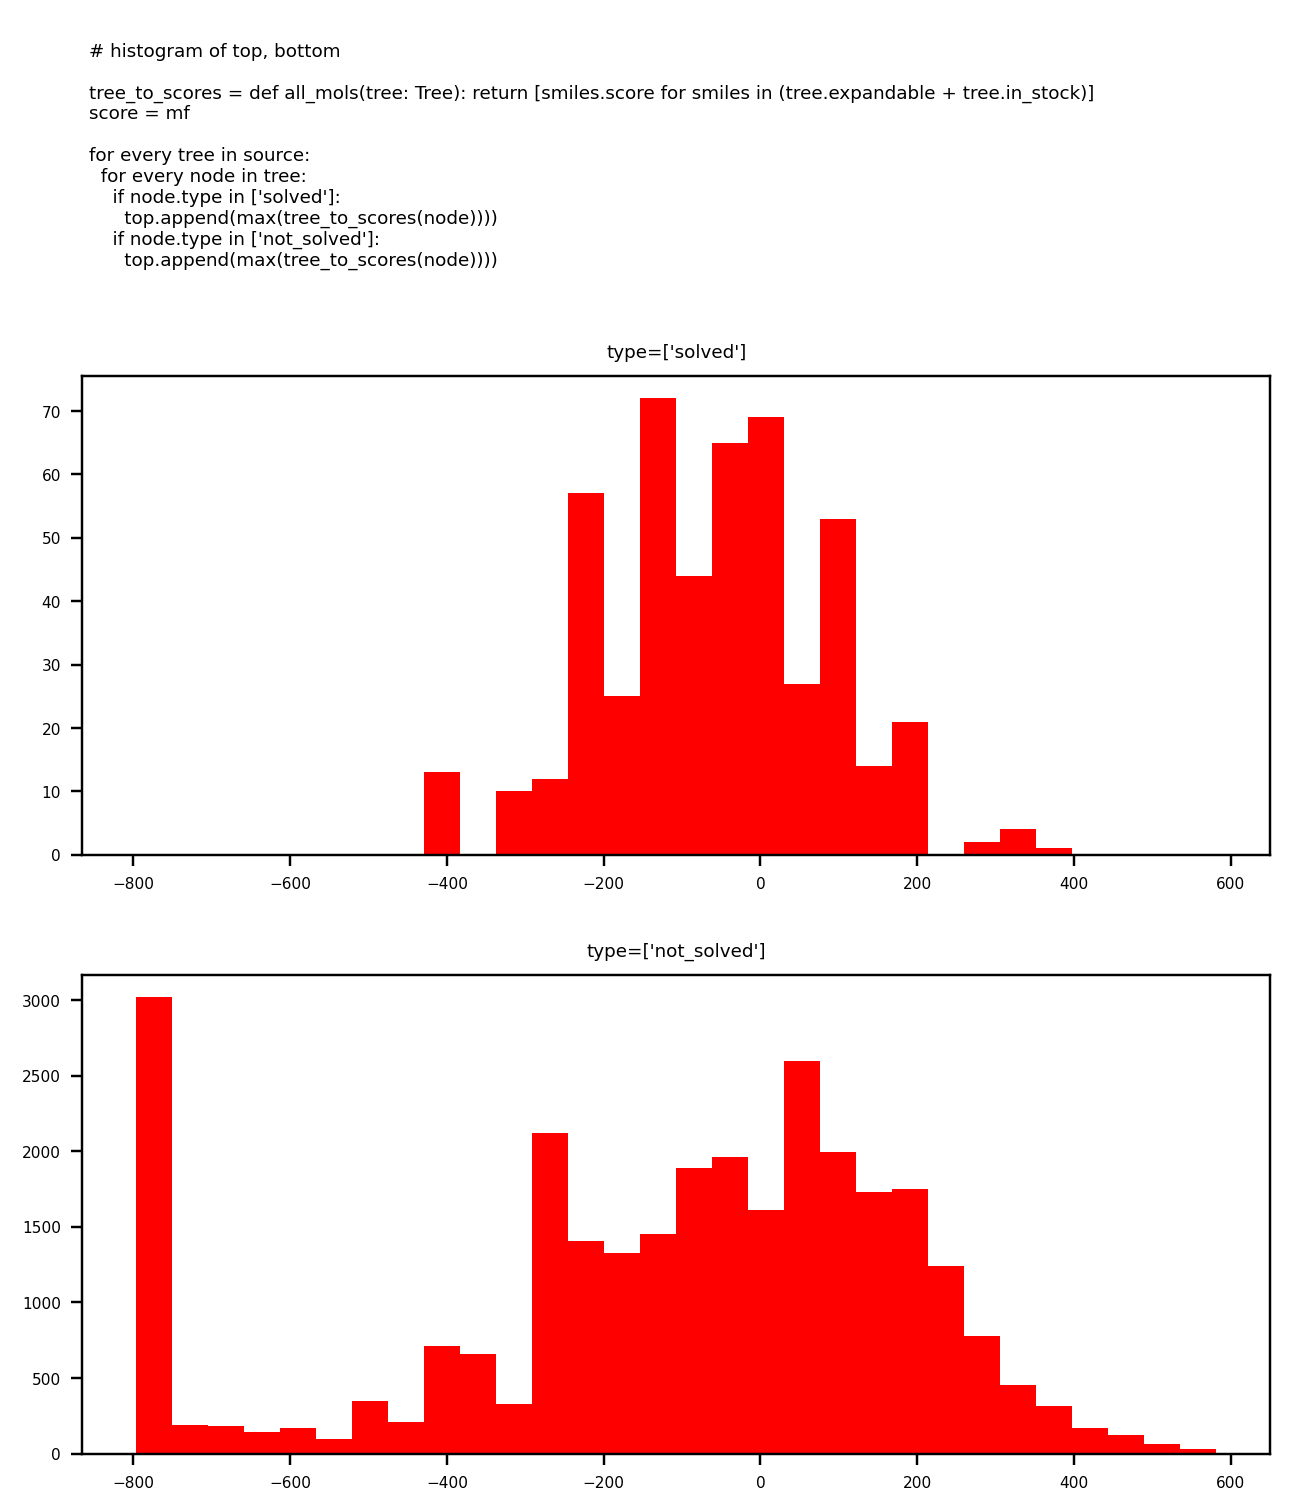

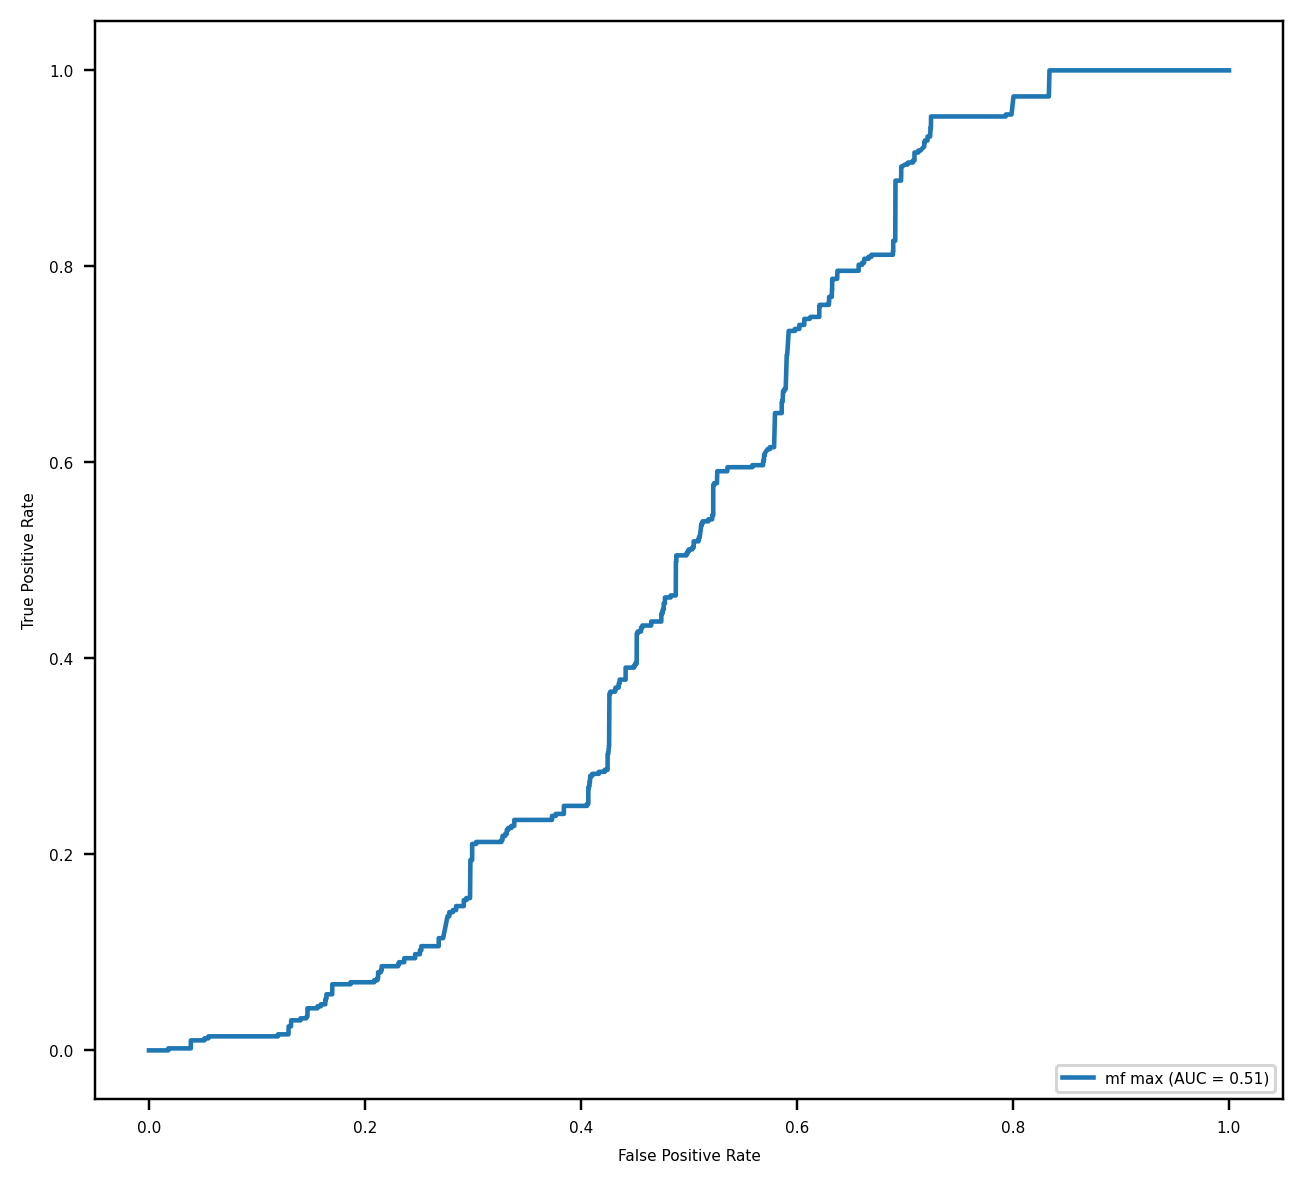

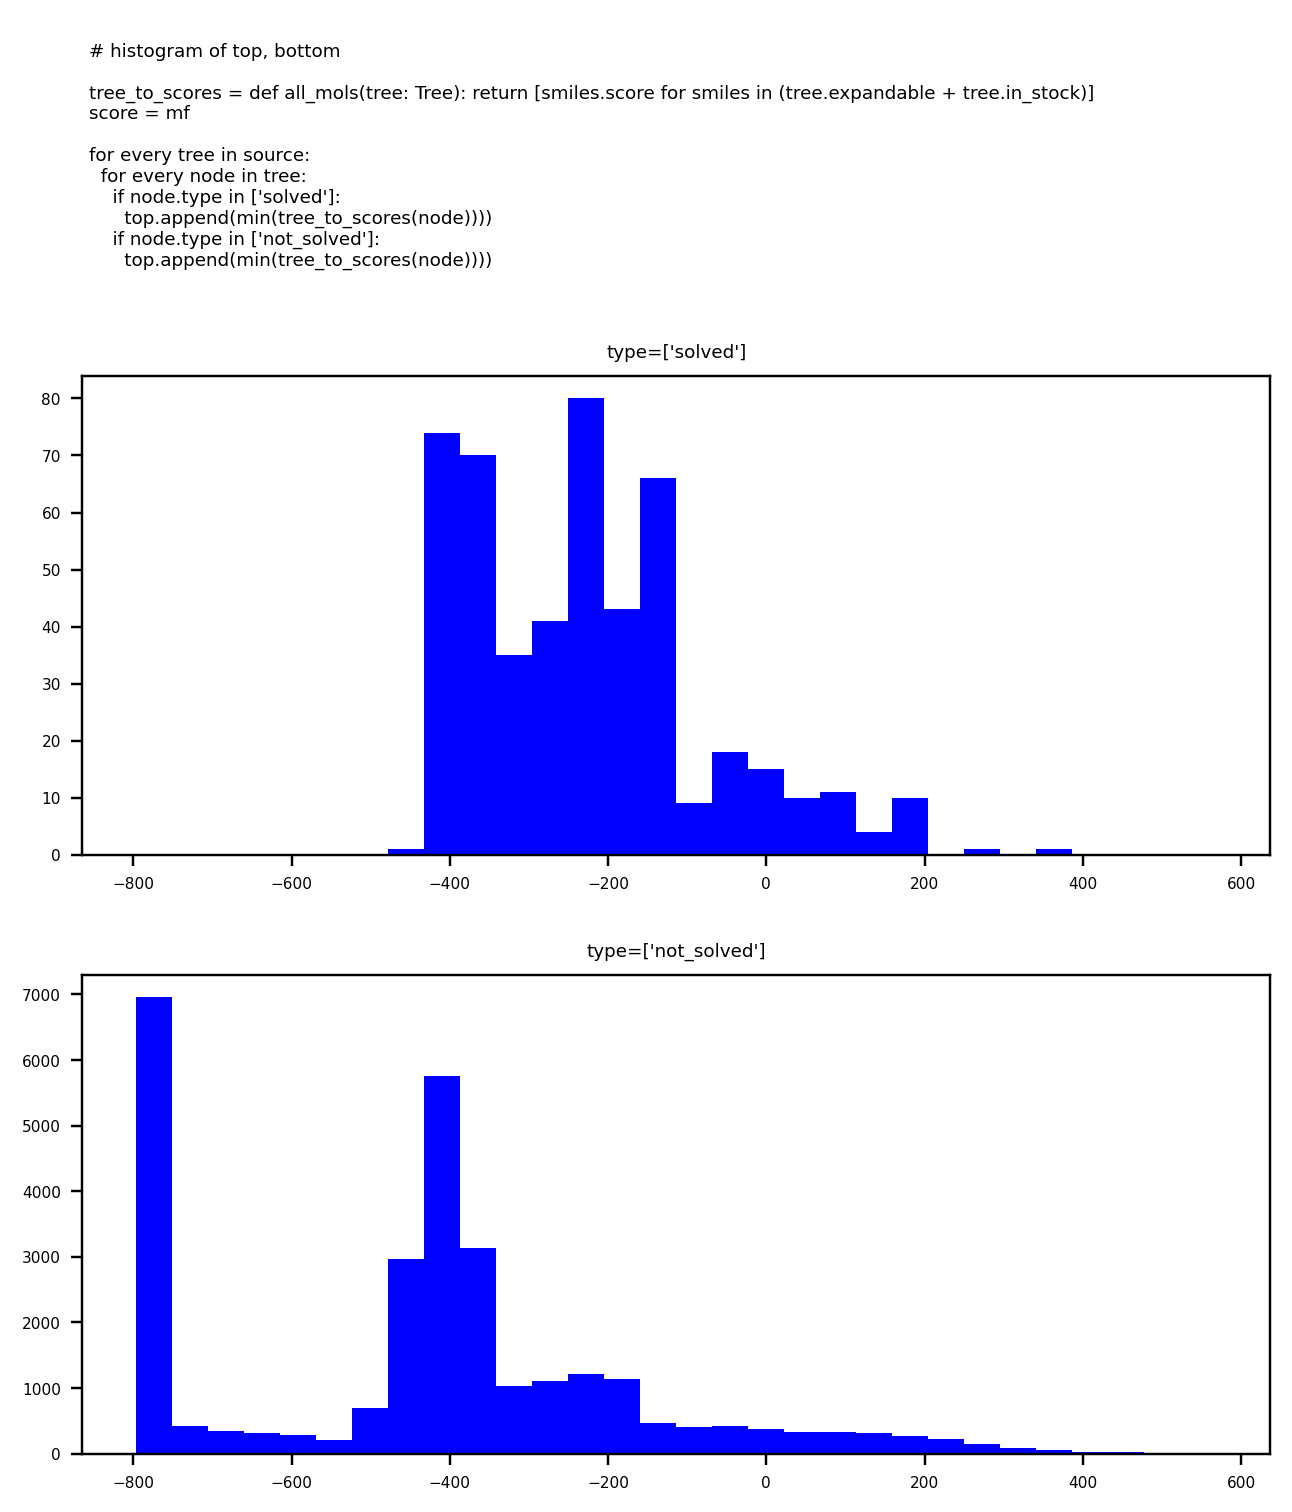

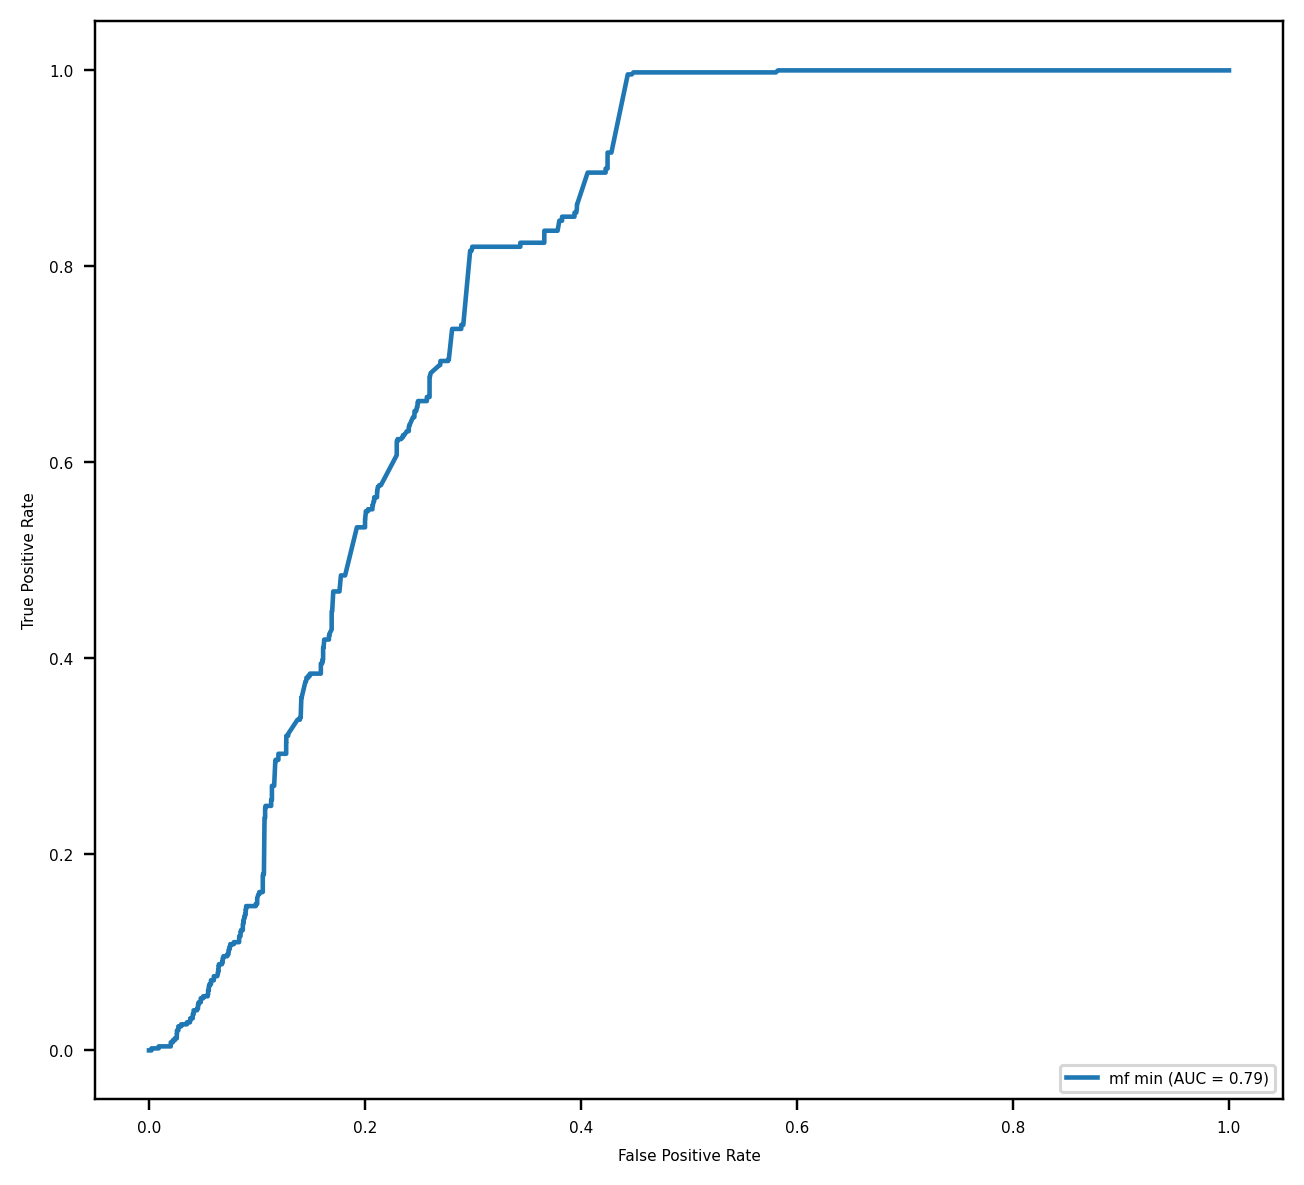

In [14]:
for ttype, btype, agg_tuple, score_getter in [
    f(["not_solved"], ["internal", "solved"], max, sa),
    f(["not_solved"], ["internal", "solved"], max, sc),
    f(["internal", "solved"], ["not_solved"], min, mf),
    f(["not_solved"], ["solved"], max, sa),
    f(["not_solved"], ["solved"], max, sc),
    f(["solved"], ["not_solved"], max, mf),
    f(["solved"], ["not_solved"], min, mf),
]:
    histogram_top_bottom(ttype, btype, all_mols, agg_tuple, score_getter, detailed)

In [15]:
aggs = [min, max, avg]
getters = Score.getters()
ttypes = [["internal"], ["solved"]]
btypes = [["not_solved"], ["not_solved"]]
# ttypes = [["internal"]]
# btypes = [["not_solved"]]


tables = get_roc_data(ttypes, btypes, all_mols, agg_list, getters)

In [16]:
print("AUC for all scores")
for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
    display(tabulate.tabulate([row[:-1] for row in table if not (row[0] == "mf" and not USE_MF)],
                              tablefmt='html'))
    # Omiting -1 because it is (tpr, fpr

AUC for all scores
['internal']  <->  ['not_solved']


sa,min,0.638365
sa,max,0.838211
sa,avg,0.8143
sc,min,0.424881
sc,max,0.741566
sc,avg,0.580018
ra,min,0.774292
ra,max,0.521649
ra,avg,0.759951
mf,min,0.797447
mf,max,0.651178


['solved']  <->  ['not_solved']


sa,min,0.80234
sa,max,0.861378
sa,avg,0.894951
sc,min,0.442279
sc,max,0.891302
sc,avg,0.786567
ra,min,0.837257
ra,max,0.617501
ra,avg,0.838338
mf,min,0.789084
mf,max,0.511104


In [5]:
# TODO dump and go

print("Dumping AUC")
whole_table = []

for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
    # Manually changing TRPs and FTRs
    # Must be done separately for dumping and pictures
    table[0][2], table[1][2] = table[1][2], table[0][2] # SA
    table[3][2], table[4][2] = table[4][2], table[3][2] # SC
#     print(table)#[0][3], table[1][3])
    whole_table.extend([row[:-1] + [str(ttype) + " <-> " + str(btype)] for row in table if not (row[0] == "mf" and not USE_MF)])
    
df = pd.DataFrame(whole_table)
df.to_csv("results/table_aucs_mf.csv")

Dumping AUC
['internal']  <->  ['not_solved']
['solved']  <->  ['not_solved']


['internal']  <->  ['not_solved']
sa min
sa max
sa avg
sc min
sc max
sc avg
ra min
ra max
ra avg
mf min
mf max
mf avg
syba min
syba max
syba avg
['solved']  <->  ['not_solved']
sa min
sa max
sa avg
sc min
sc max
sc avg
ra min
ra max
ra avg
mf min
mf max
mf avg
syba min
syba max
syba avg


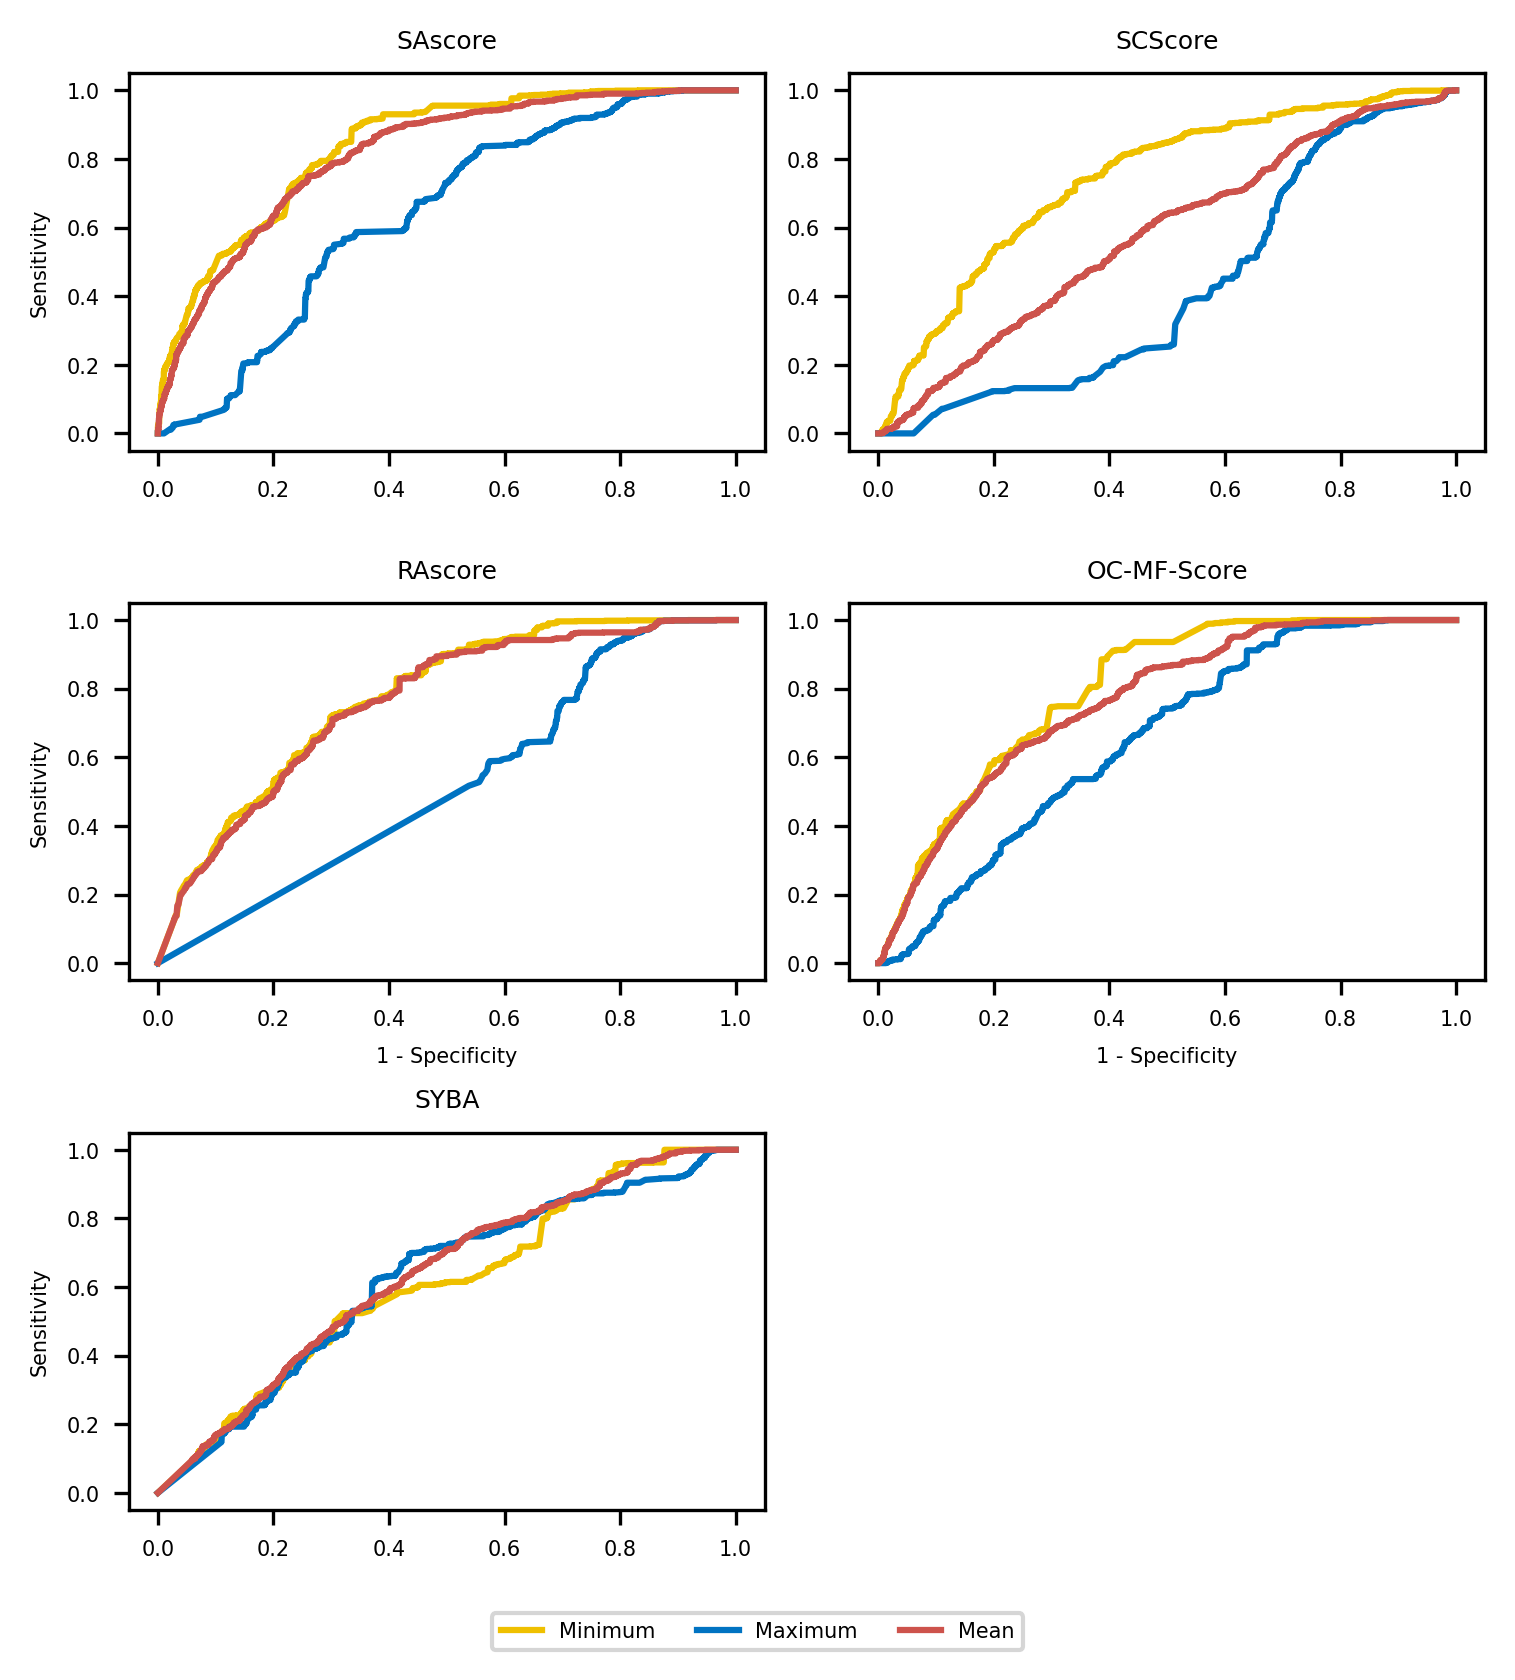

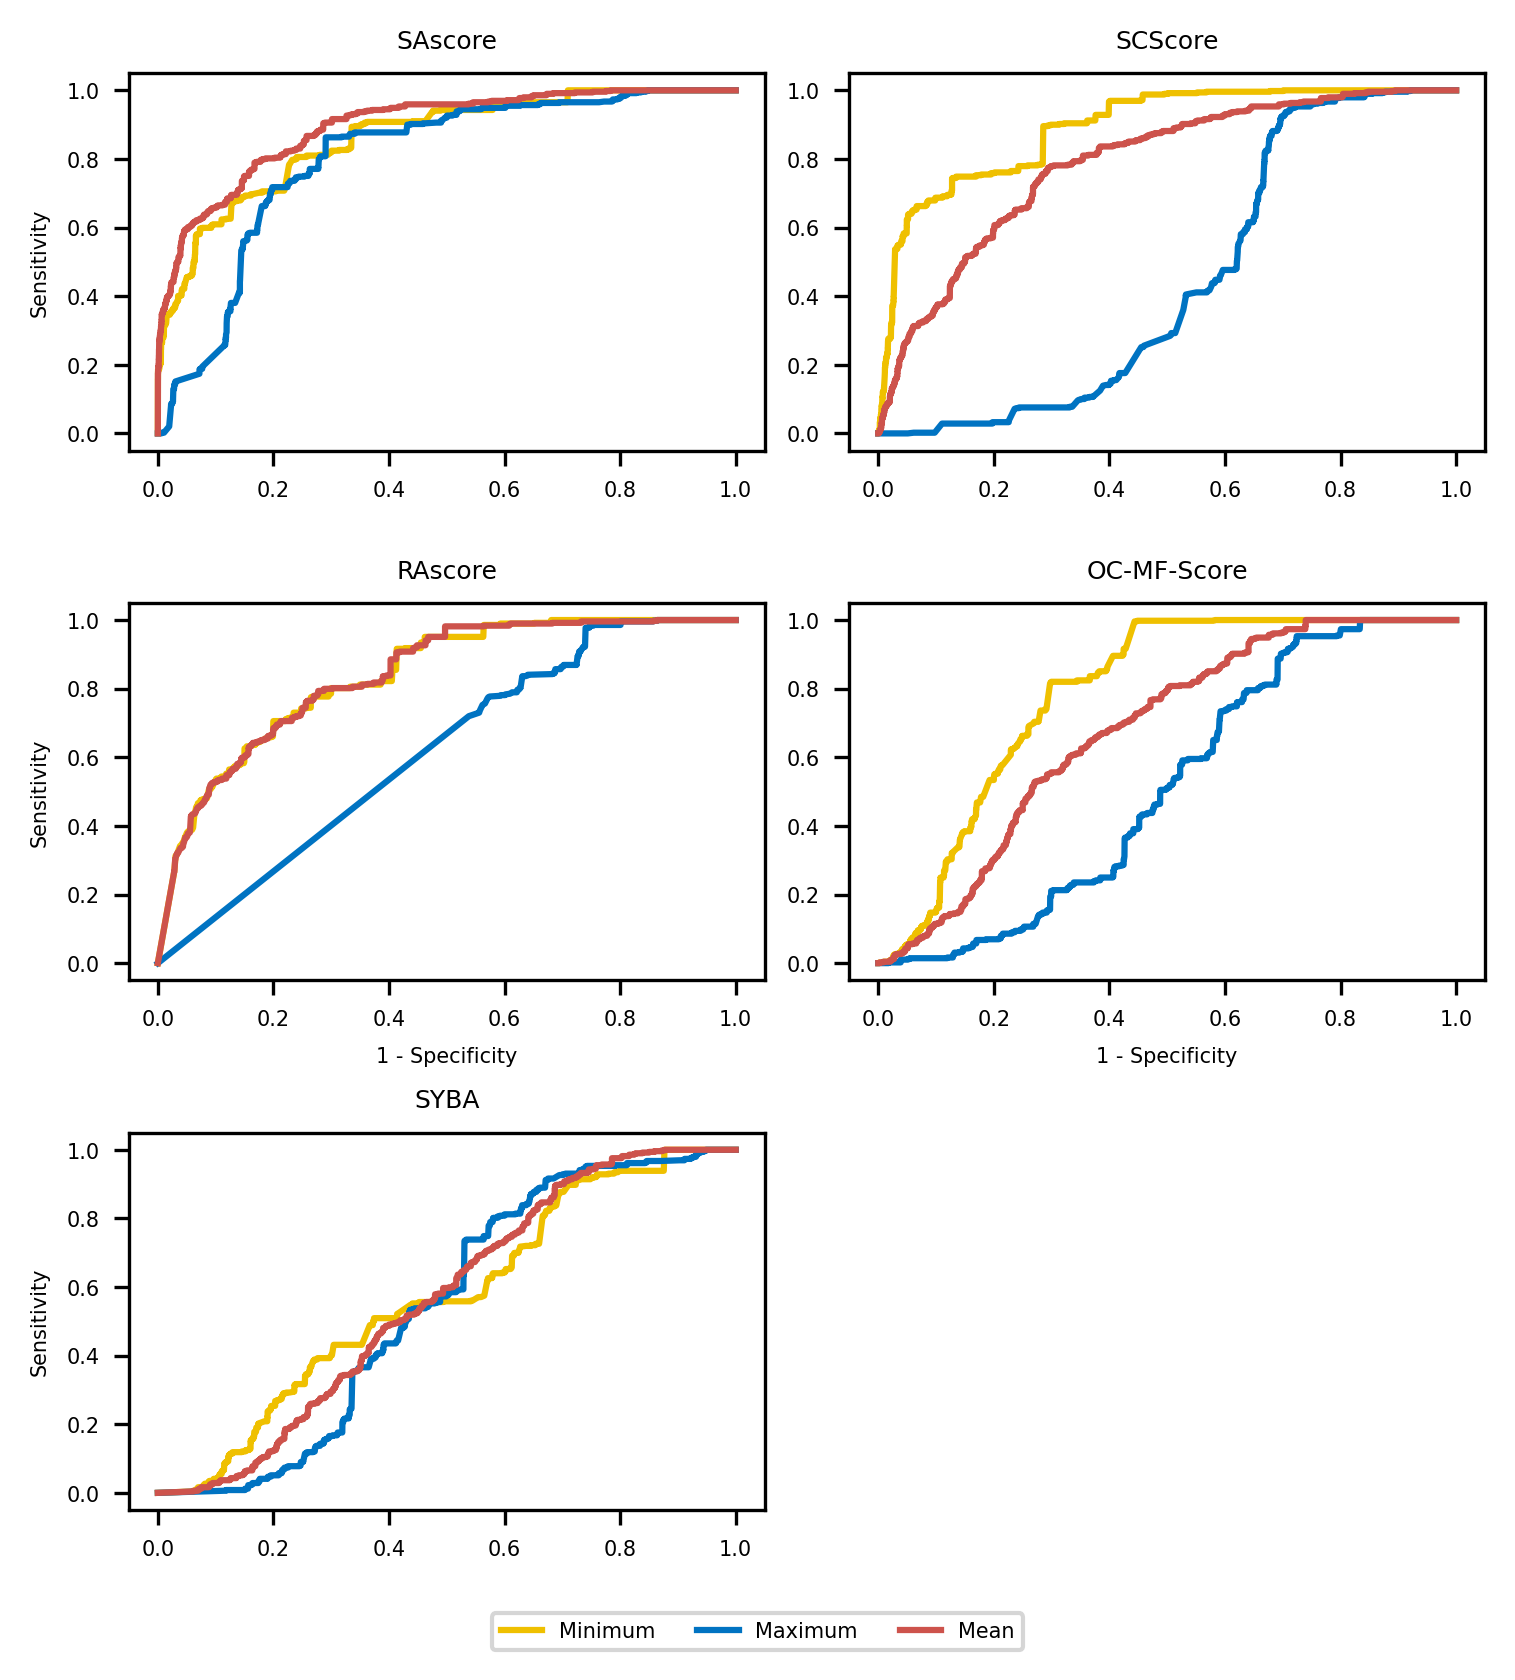

In [17]:
# Plotting 4 plots with 3 rocs
import string

names = [score_name for score_name, _ in Score.getters() if not (score_name == "mf" and not USE_MF)]
mapping = {name:i for i, name in enumerate(names)}

full_names = ["SAscore", "SCScore", "RAscore", "OC-MF-Score", "SYBA"] if USE_MF \
              else ["SAscore", "SCScore", "RAscore", "SYBA"]

agg_names = {"min": "Minimum", "max": "Maximum", "avg": "Mean"}
colors = {"max": "#0073C2", "min": "#EFC000", "avg": "#CD534C"}

for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
#     fig, axs = plt.subplots(1, 4, figsize=(8, 1.3))
    fig, axs = plt.subplots(3, 2, figsize=(5, 5.25))
    fig.set_dpi(300)
    # Manually changing TRPs and FTRs
    # Warning! Do not rerun it twice as it becames returned to initial config.
    table[0][3], table[1][3] = table[1][3], table[0][3] # SA
    table[3][3], table[4][3] = table[4][3], table[3][3] # SC
    for score_name, agg_name, _, (fpr, tpr) in table:
        print(score_name, agg_name)
        if not (score_name == "mf" and not USE_MF):
            index = mapping[score_name]
#             ax = axs[index % 4]
            ax = axs[index // 2][index % 2]
            ax.plot(fpr,tpr, label=agg_name, color=colors[agg_name])
            ax.set_title(full_names[index])
            handles, labels = ax.get_legend_handles_labels()
            if index % 2 == 0:
                ax.set_ylabel("Sensitivity")
            if index // 2 == 1:
                ax.set_xlabel("1 - Specificity")
    if USE_MF:
        axs[-1, -1].axis('off')
    fig.legend(handles, [agg_names[l] for l in labels], loc='lower center',
               bbox_to_anchor=(0.5,-0.05), ncol=3)
#             ax.text(-0.1, 1.1, string.ascii_uppercase[index], transform=ax.transAxes, 
#                 size=20, weight='bold')
# plt.legend()
    plt.tight_layout()
#     plt.show()
#     plt.savefig(
#         "figures/rocs_{}_{}.pdf".format(
#             ttype[0], btype[0]),
#         bbox_inches='tight')

# TODO, better colors

In [18]:
df

,0,1,2,3
0,sa,min,0.841032,['internal'] <-> ['not_solved']
1,sa,max,0.639159,['internal'] <-> ['not_solved']
2,sa,avg,0.817527,['internal'] <-> ['not_solved']
3,sc,min,0.752764,['internal'] <-> ['not_solved']
4,sc,max,0.426312,['internal'] <-> ['not_solved']
5,sc,avg,0.587193,['internal'] <-> ['not_solved']
6,ra,min,0.779700,['internal'] <-> ['not_solved']
7,ra,max,0.525857,['internal'] <-> ['not_solved']
8,ra,avg,0.766668,['internal'] <-> ['not_solved']
9,mf,min,0.796398,['internal'] <-> ['not_solved']
